<a href="https://colab.research.google.com/github/GruveJL/MVP3_PUC_RIO/blob/main/MVP_3_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP 3 - Machine Learning & Analytics**

**Nome:** Juan Carlos da Silva Rodrigues de Lima

**Matrícula:** 4052025000033

**OBS** - Para executar esse arquivo é necessário estar logado em uma conta do Google*

# **Proposta do Projeto**

A ideia do projeto é fazer um MVP para praticar a aplicação de um modelo de Machine Learning em um Banco de Dados. O foco aqui será a exploração e compreensão dos dados, além de testar alguns tipos de modelos, avaliando seus resultados e entendendo qual deles teve mais "*fit*" ao conjunto dos dados disponíveis.

Os Arquivos e pastas estão hospedados no Google Drive nos links abaixo:
* [Arquivo](https://colab.research.google.com/drive/1c4lABjnrupla1RFAvOfg6f-5tRqFp-dt?usp=drive_link)
* [Dataset Original](https://drive.google.com/file/d/14wEv9mRXmUyT0z_TNFRF_O95gcS0Li8c/view?usp=drive_link)
* [Pasta do Projeto no Drive](https://drive.google.com/drive/folders/1bQO6TRw0ohoOZPXk2MxwIzeh3zHjIxDA?usp=drive_link)

E como referência neste repo do Github

#**Dataset**

Usarei aqui um conjunto de dados reduzido em tamanho para que os devidos testes com os modelos sejam mais performáticos. A fonte de dados foi o repositório  [Kaggle](https://www.kaggle.com/) um site com diversas bases de dados disponíveis para tratamento e aplicação de análises e modelos.

O Banco de dados escolhido relaciona o preço do plano de saúde (insurence) cobrado nos Estados Unidos da América com algumas características do assegurado.

O Dataset pode ser encontrado [**aqui**](https://www.kaggle.com/datasets/mosapabdelghany/medical-insurance-cost-dataset).

## Seleção e Atributos de Dados

O Dataset possui **1338** entradas com **7 colunas** incluindo a coluna de valor do seguro.

Para nosso projeto usaremos todas as colunas, segue descrição:
* **age** - Idade do beneficiário do plano. | Int
* **sex** - Gênero do beneficiário. | String
* **bmi** - IMC (Índice de Massa Corporal), métrica de correlacionamento entre massa e altura corporal, medida dividindo peso pela altura ao quadrado. | Float
* **children** - Quantidade de crianças cobertas pelo plano. | Int
* **smoker** - Situação de fumante do beneficiário. | String
* **region** - Região dos EUA no qual reside o beneficiário. | String
* **charges** - Custo da conta gerada para o beneficiário em questão em dólar ($). | Float


# **Hipóteses do Problema**

Temos dois tipos de problema que tentarei resolver:
* Entender se apenas com esses dados é possível treinar um modelo para prever o custo de um plano de saúde.

* Avaliar a diferença de preço dadas as categorias.


### Hipóteses

O primeiro problema é uma questão exploratória, essa base é uma das mais baixadas na plataforma, diversos trabalhos foram realizados e a dúvida é se conseguimos com poucas variáveis um modelos acertivo.

Já o segundo, tentaremos entender se há uma correlação explicita entre as variáveis e o senso comum sobre elas, por exemplo que pessoas fumantes, ou com muitos filhos, ou até mesmo as do gênero feminino terem uma conta de plano maior por aprensentarem mais riscos as seguradoras.

Por ser um Dataset pequeno usarei todos os dados disponíveis exceto linhas julgadas necessárias serem retiradas pelo processo de tratamento dos dados.

### Tipo de Problema

Trata-se de um caso clássico de Aprendizado Supervisioinado de Regressão Linear, no qual tentaremos prever os preços dadas as caracteristicas disponíveis, a ideia aqui será testar diferentes tipos de modelos, entender qual deles tem melhores resultados e a partir deles tirar as devidas conclusões sob as hipóteses apresentadas.

# Importação das Bibliotecas Necessárias e Carga de Dados

Aqui importaremos todas as Bibliotecas necessárias e as Bases a serem utilizadas.

In [104]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

#SCIKIT LEARN
#Treino e Teste
from sklearn.model_selection import train_test_split
#Pré processamento
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
#REGRESSORES
#Linear
from sklearn.linear_model import LinearRegression
#Regularização Ridge
from sklearn.linear_model import Ridge
#Regularização Lasso
from sklearn.linear_model import Lasso
#KNN
from sklearn.neighbors import KNeighborsRegressor
#Árvore
from sklearn.tree import DecisionTreeRegressor
#SVM
from sklearn.svm import SVR
#VALIDAÇÕES
#MSE
from sklearn.metrics import mean_squared_error
#Preparação de Folds de Validação Cruzada
from sklearn.model_selection import KFold
#Execução das Validações
from sklearn.model_selection import cross_val_score
#Grid Search para teste de hiperparâmetros
from sklearn.model_selection import GridSearchCV


#Biblioteca para ignorar warnings
import warnings
#Ignorar apenas os avisos do tipo "UserWarning"
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore")

## Seed Global de Randomização

In [41]:
#Definindo seed global
SEED = 13
random.seed(SEED)
np.random.seed(SEED)

A base foi baixada do Kaggle e hospedada no drive com acesso público.

In [42]:
#Import biblioteca para consumo do Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
#Url do caminho do arquivo no Drive
url_insure = "/content/drive/MyDrive/MVP3/Datasets/insurance.csv"

In [44]:
#Importanto os Dataset
dataset_insure = pd.read_csv(url_insure, delimiter=',');

In [45]:
#Preview dos Dados
dataset_insure.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Tratamentos**

Aqui iremos entender um pouco melhor o Dataset, ver dados faltantes e fazer alguns tratamentos para deixa a base de dados melhor utilizável.

Aparentemente essa é uma base já limpa, portanto serão feitos pequenos ajustes para assegurar a qualidade dos dados.

Iniciaremos com as validações padrão, entender os tipos dos dados, se há muitos nulos em alguma coluna, se há repetições, e avaliar um possivel ajuste nas variáveis categóricas.

In [46]:
#Describe dos dados
dataset_insure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Tipos de dados validados conforme esperado.

In [47]:
#Entradas Únicas
dataset_insure.nunique()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


Como visto anteriormente temos 7 colunas, das quais duas tem apenas dois valores distintos, a coluna "*sex*" (male, female) e a coluna "*smoker*" (yes, no), irei substituir essas colunas por colunas com valores numéricos (1, 0) apenas para facilitar a visualização e ajudar em otimizações futuras.

In [48]:
#Substituindo valores coluna smoker
dataset_insure["smoker"] = dataset_insure["smoker"].replace({"yes": 1, "no": 0}).astype(int)

#Substituindo valores coluna smoker
dataset_insure["sex"] = dataset_insure["sex"].replace({"male": 1, "female": 0}).astype(int)

In [49]:
#Validando mudança
dataset_insure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


Agora irei validar linhas duplicadas, essa etapa será penas para conhecimento, já que a base não possui um identificador único por linha, entretando é importante saber se existem linhas exatamente iguais na base.

In [50]:
#Aplicando método Duplicated
duplicados = dataset_insure[['age','sex','bmi','children','smoker','region','charges']].duplicated()

#Soma dos duplicados
num_duplicados = duplicados.sum()

print("Número de Linhas Duplicadas:", num_duplicados)

Número de Linhas Duplicadas: 1


Ao que parece temos uma linha duplicada

In [51]:
#Mostrar as linhas duplicadas
linhas_duplicadas = dataset_insure[dataset_insure[['age','sex','bmi','children','smoker','region','charges']].duplicated(keep=False)]

print(linhas_duplicadas)

     age  sex    bmi  children  smoker     region    charges
195   19    1  30.59         0       0  northwest  1639.5631
581   19    1  30.59         0       0  northwest  1639.5631


Como nesse caso há apenas duas linhas que possuem exatamente o mesmo valor, irei manter, entretanto me ocorreu a dúvida se podem haver linhas com características de beneficiário iguais, mas com valores de cobrança diferentes, é o que iremos verificar:

In [52]:
#Aplicando método Duplicated nas colunas de caracteristicas
duplicados_sem_valor = dataset_insure[['age','sex','bmi','children','smoker','region']].duplicated()

#Soma dos duplicados
num_duplicados = duplicados_sem_valor.sum()

print("Número de Linhas Duplicadas:", num_duplicados)

Número de Linhas Duplicadas: 3


In [53]:
#Mostrar as linhas duplicadas
linhas_duplicadas_sem_valor = dataset_insure[dataset_insure[['age','sex','bmi','children','smoker','region',]].duplicated(keep=False)]

print(linhas_duplicadas_sem_valor)

     age  sex     bmi  children  smoker     region      charges
102   18    0  30.115         0       0  northeast  21344.84670
181   18    0  38.280         0       0  southeast   1631.82120
195   19    1  30.590         0       0  northwest   1639.56310
354   18    0  38.280         0       0  southeast  14133.03775
471   18    0  30.115         0       0  northeast   2203.47185
581   19    1  30.590         0       0  northwest   1639.56310


Como visto temos as linhas **195** e **581** exatamente iguais e mais duas linhas que se duplicam mas oferecem valores diferentes para as mesmas características de beneficiários.

Isso pode acontecer devido a falta de alguma outra informação que caracteriza essas linhas, como planos de saúde diferente ou alguma outra característica do beneficiário que correlaciona a diferença no preço.

Sendo poucas linhas irei retirá-las com o intuito de melhorar a performance da futura aplicação dos modelos de ML, entretanto fica atestado que ao testar a validação do modelo levemos em conta que a lógica para conseguir os valores pode ser **dúbia ou dependente de uma outra variável do qual não temos acesso**.

In [54]:
#Quantidade de Linhas dataset
print("Número de linhas após remoção:", len(dataset_insure))

Número de linhas após remoção: 1338


In [55]:
#Remover duplicados considerando colunas de característica
dataset_insure = dataset_insure.drop_duplicates(subset=['age','sex','bmi','children','smoker','region'], keep='first')

#Verificar quantas linhas sobraram
print("Número de linhas após remoção:", len(dataset_insure))

Número de linhas após remoção: 1335


As três linhas duplicadas foram retiradas.

### DATASET Final

Validado alguns pontos entendo que não precisamos fazer grandes mudanças, manterei os valores substituídos das colunas "*sex*" e "*smoker*" e as linhas duplicadas, tendo em mente a necessidade de mais características para um modelo totalmente acurado.

In [56]:
#Montando df para análise:
df = dataset_insure

#Preview do dataset final
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


# **Análise de Dados**

Nesta etapa vamos realizar a Análise de Dados Exploratória (EDA) dos datasets, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

Todo o tratamento realizado até aqui ajudará a entender melhor as variáveis do dataset

Vamos abordar agora os dados de forma mais visual já focando em nossas hipóteses inicias.

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [57]:
#Describe dos dados
df.describe()

,age,sex,bmi,children,smoker,charges
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,39.253933,0.505618,30.658157,1.097378,0.205243,13286.778216
std,14.030779,0.500156,6.101456,1.205727,0.404031,12115.615150
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.255000,0.000000,0.000000,4746.698450
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9386.161300
75%,51.000000,1.000000,34.687500,2.000000,0.000000,16717.010750
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


Como alteramos os tipos das colunas sex e smoker, podemos também usar os describe para entender um pouco da distribuição, vendo que a base está bem distribuída com relação a gênero, aproximadamente 50% para cada categoria e uma baixa relação de fumantes, em torno de 20% da base.

Na média as pessoas possuem 1 filho, e 75% da base tem até dois filhos.

A base não aparenta ter *outliers* discrepantes, sendo o maior valor do "*bmi*" (IMC em português) o único que se destaca, tendo em mente a tabela de comparação oferecida pela OMS (Organização Mundial da Saúde), como segue:

### Tabela OMS de IMC (Índice de Massa Corporal)  sobre obesidade adulta

Segundo [OMS](https://www.who.int/data/gho/data/themes/topics/topic-details/GHO/body-mass-index) é considerado sobrepeso um índice maior que 25 e obesidade acima do índice 30, de acordo com alguns graus, como segue tabela:

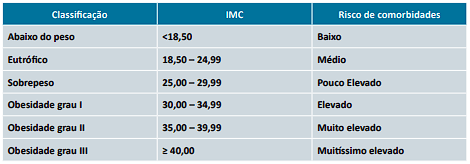

Imagem pode ser encontrada na [cartilha informativa sobre obesidade](https://www.gov.br/conitec/pt-br/midias/protocolos/resumidos/PCDTResumidodeSobrepesoObesidade.pdf.pdf) no portal do ministério da saúde, lembrando que o IMC não leva em conta outros fatores de extrema importância para atestar riscos à saúde como massa múscular, etnia, e demais outros.

Com a tabela de referência entendemos que os valores de máximo e mínimo da coluna "*bmi*" chamam a atenção, tentaremos entender a diante se tem relação positiva com o valor do preço.

## Distribuição

Nesta etapa veremos a distribuição dos dados das colunas.

In [58]:
#Função para criar gráficos com distribuição
def plot_hist(df, col, kde=True, bins=30):
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=kde, bins=bins)
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.show()

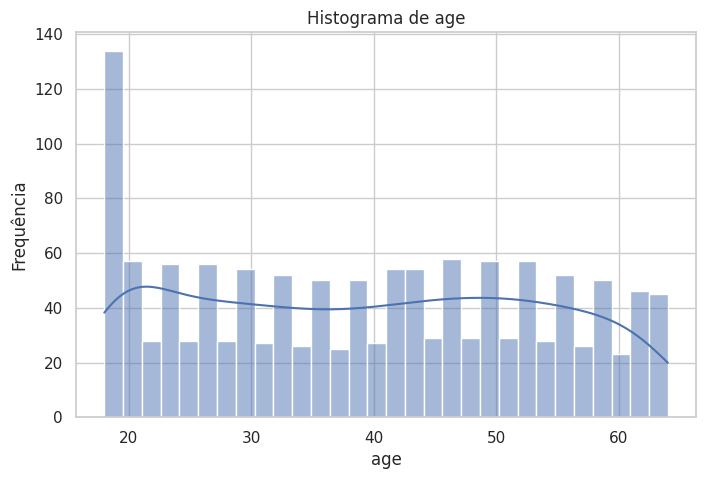

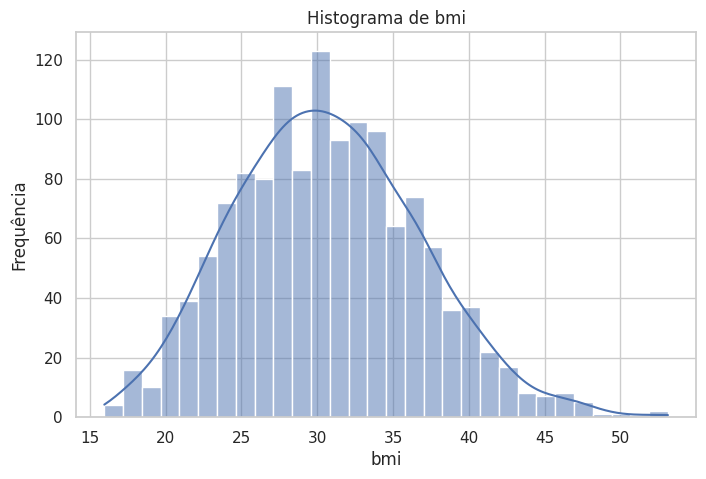

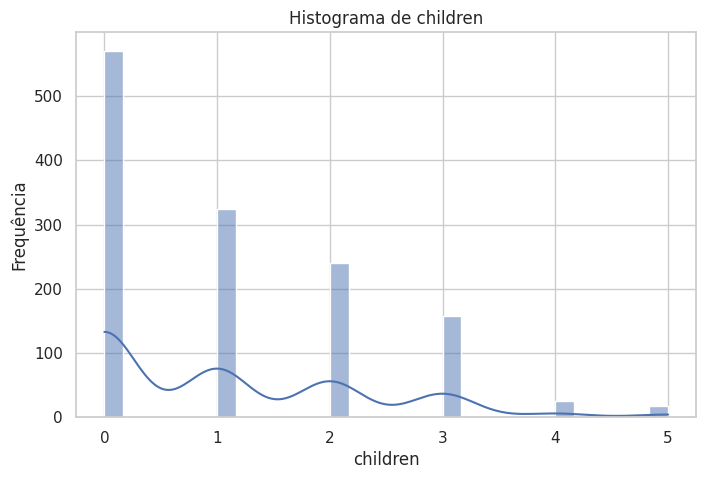

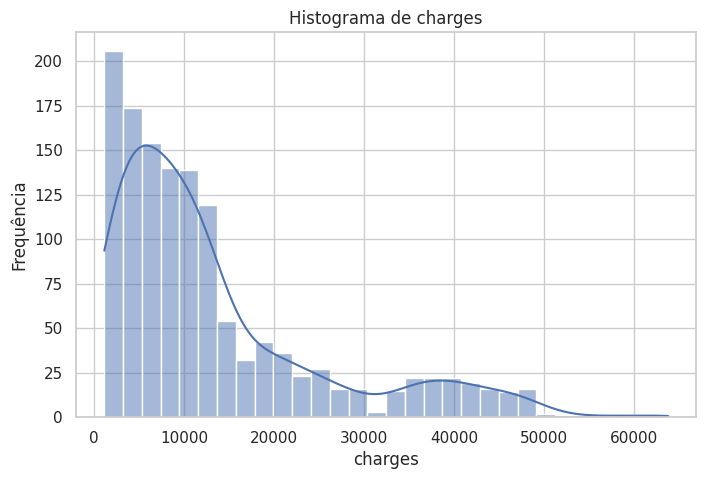

In [59]:
#Colunas a serem analisadas
for col in ["age", "bmi", "children", "charges"]:
    plot_hist(df, col)

Vemos com as distribuições que temos uma quantidade considerável da base concentrada na idade de 19.

Uma distribuição esperada em IMC e quantidade de filhos.

Sobre valores temos uma considerada concentração em contas abaixo de 10k dólares, entretanto muitos valores acima, inclusive altos chegando e ultrapassando os 60k dólares.

Vamos olhar agora as variáveis categóricas:

In [60]:
#Função de gráfico para variáveis categóricas
def plot_count(df, col):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette="Set1")
    plt.title(f"Contagem de {col}")
    plt.xlabel(col)
    plt.ylabel("Quantidade")
    plt.show()

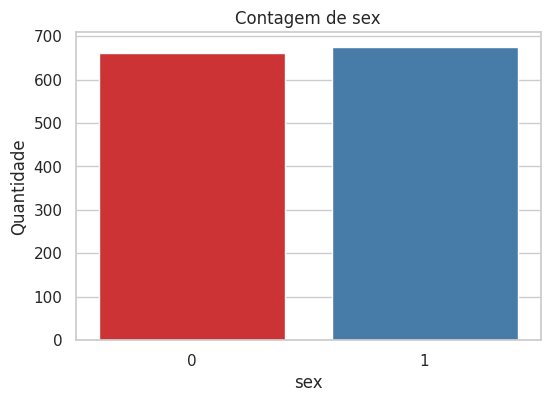

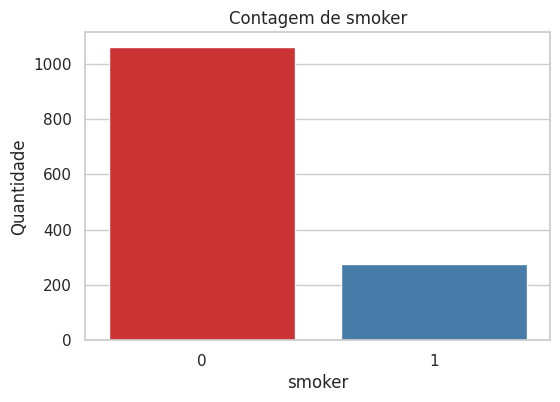

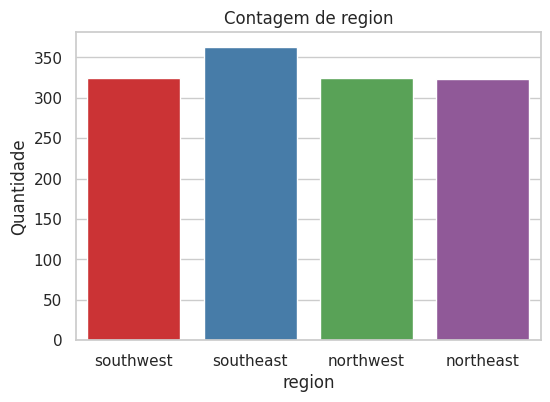

In [61]:
#Colunas a serem analisadas
for col in ["sex","smoker","region"]:
    plot_count(df, col)

Como visto anteriormente, uma boa homogeniedade entre as variáveis "*sex*" e "*region*" e baixa quantidade de fumantes.

Vamos agora ver uma distribuição conjunta dos dados:


In [62]:
#Função de pairplot
def plot_pair(df, hue=None):
    warnings.filterwarnings("ignore", category=UserWarning)  # silenciar avisos

    sns.set(style="whitegrid")
    g = sns.pairplot(
        df,
        hue=hue,
        palette="Set2",
        diag_kind="kde",
        plot_kws={'alpha':0.6, 's':40}
    )
    g.fig.set_size_inches(10, 8)
    plt.show()

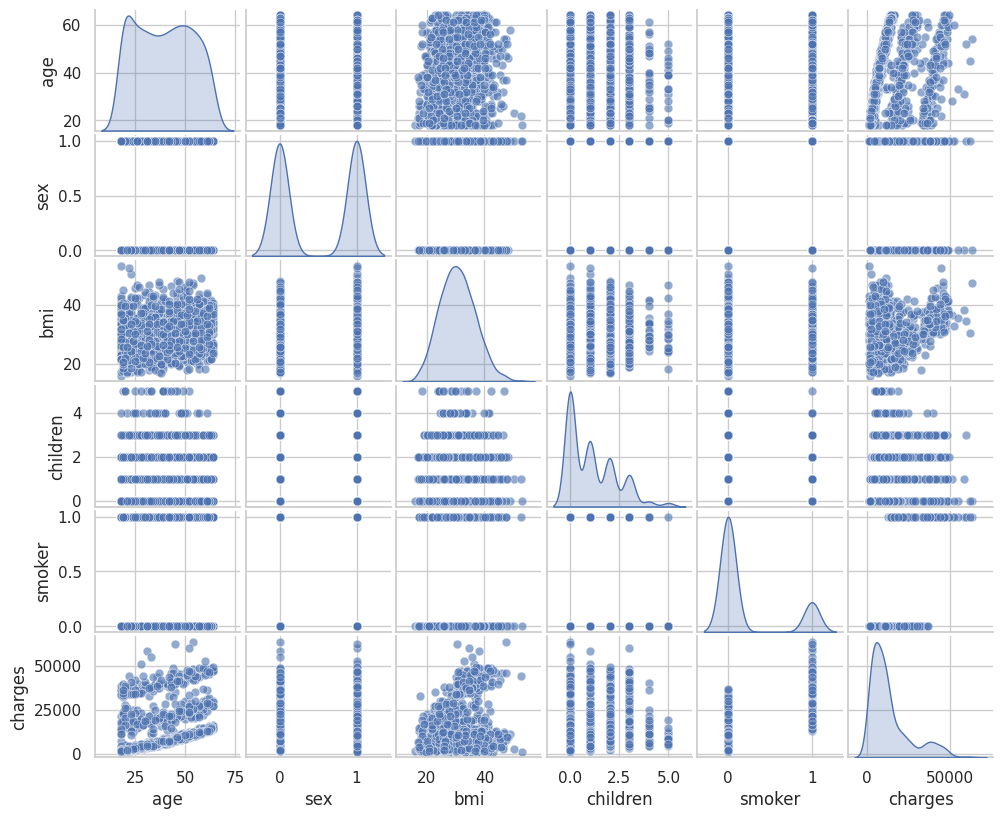

In [63]:
#Plotando Pairplot
plot_pair(df)

Podemos também com essa função dar um destaque à alguma variável como "*smoker*" por exemplo:

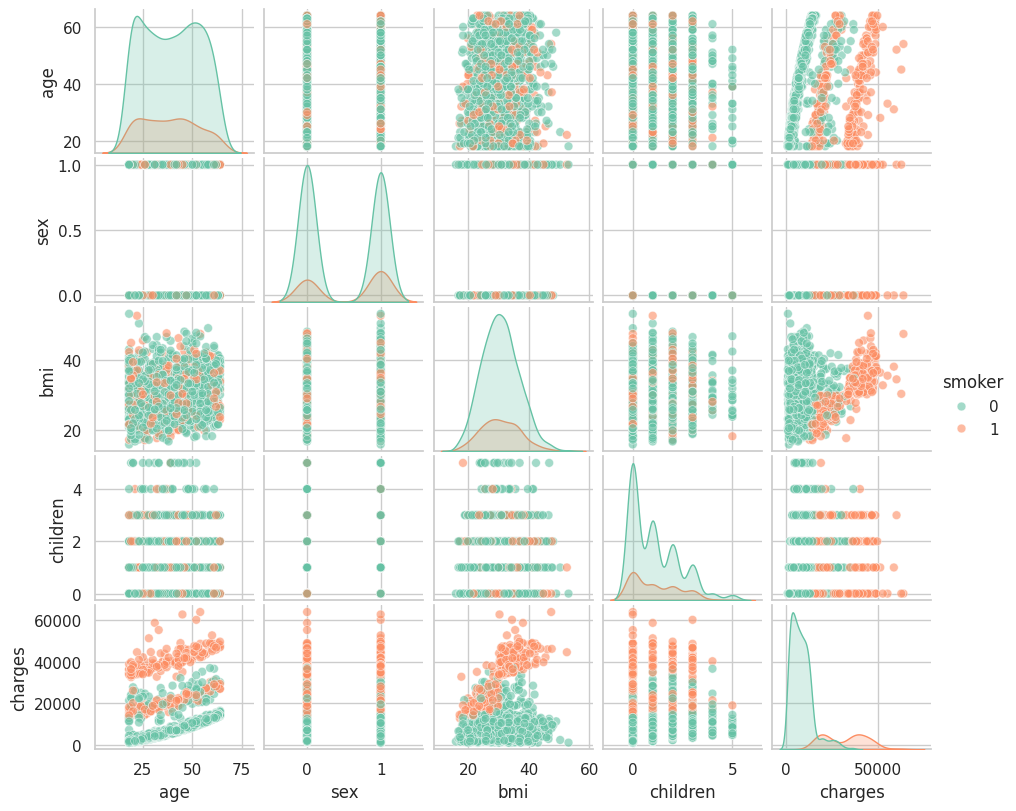

In [64]:
#Plotando pairplot com destaque em "smoker"
plot_pair(df,"smoker")

## Correlação

A correlação é uma medida estatística que indica o grau de relação entre duas variáveis variado de [-1, 1] nos mostra se as variáveis estão fortemente correlacionadas (1) ou fortemente inversamente correlacionadas(-1)

Podemos ter uma visão geral com a matriz de correlação:

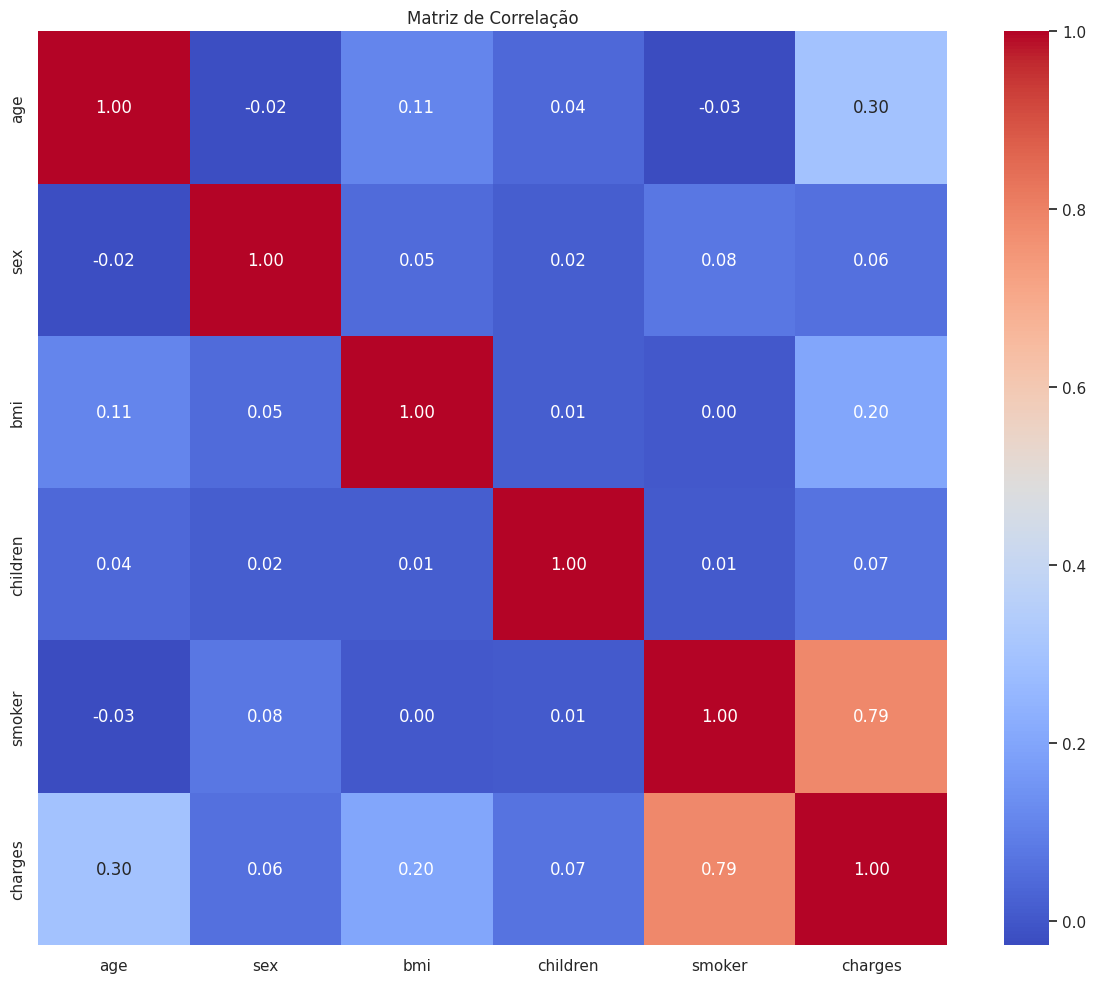

In [65]:
#Matriz correlação
correlacao = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlacao, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

Para facilitar a visualização vamos pegar apenas a parte inferior da matriz:

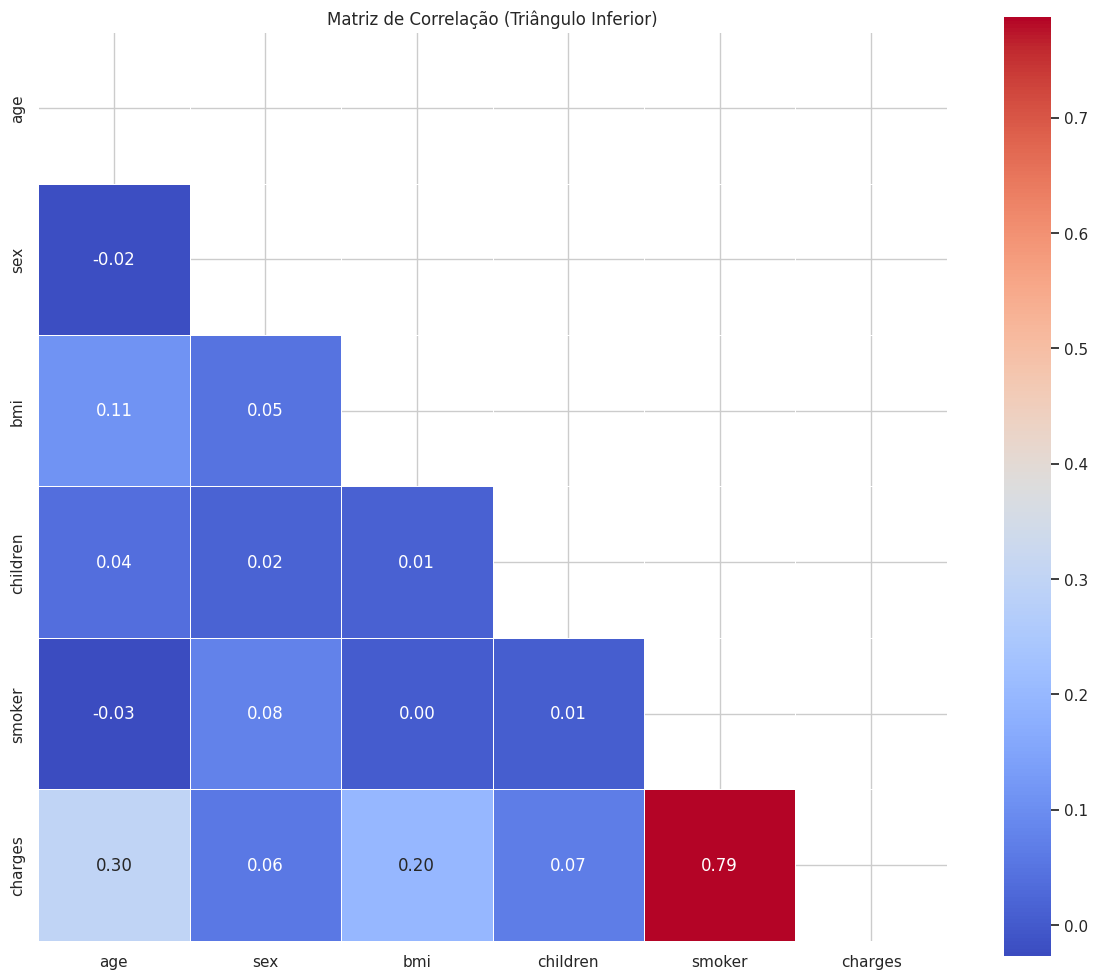

In [66]:
#Calcular correlação
correlacao = df.corr(numeric_only=True)

#Criar máscara para a parte superior
mask = np.triu(np.ones_like(correlacao, dtype=bool))

#Plot
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlacao,
    mask=mask,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=True
)
plt.title('Matriz de Correlação (Triângulo Inferior)')
plt.tight_layout()
plt.show()

Com isso já temos fortes evidências da correlação entre a coluna "smoker" e "charges", o que de fato pode ajudar a avaliar a hipótese de senso comum que pessoas que fumam tem contas mais cara de planos de saúde.

In [67]:
#Função para distribuição
def plot_hist_by_cat(df, col_num, col_cat):
    plt.figure(figsize=(8,5))
    sns.histplot(df, x=col_num, hue=col_cat, element="step", stat="density", common_norm=False, palette="Set2")
    plt.title(f"Distribuição de {col_num} por {col_cat}")
    plt.show()

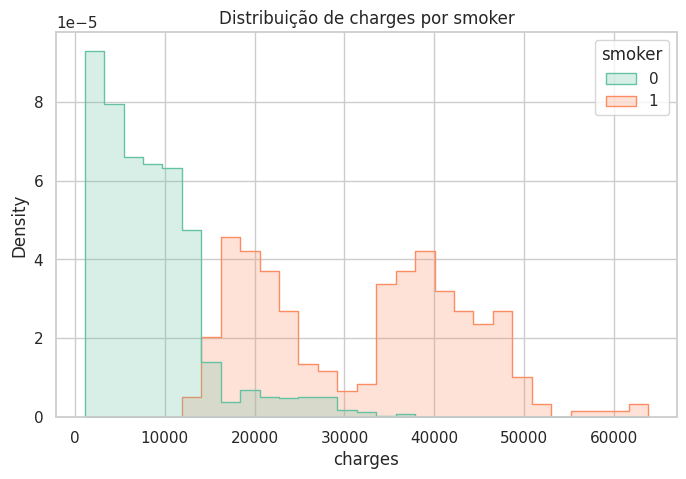

In [68]:
#Plot da relação charges e smoker
plot_hist_by_cat(dataset_insure, "charges", "smoker")

Podemos observar que há uma certa correlação entre não fumantes e os valores mais baixos das contas pagas.

# **Pré-Processamento de Dados**

Como parte obrigatória do estudo iremos agora para o pré processamento voltado para a aplicação do modelo, nele iremos fazer mais algumas transformações, split entre teste e treino e as conclusões finais sobre as hipóteses levantadas.

Mesmo com a comprovação da baixa correlação entre a maioria das variáveis, podemos aida aplicar alguns modelos e entender qual deles possui maior acertividade e tentar mapear as possíveis causas de porque um modelo pode ou não ser melhor que outros para esse tipo de caso.

Para a aplicação do modelo vamos separar as variáveis categóricas em colunas distintas, segundo teoria os modelos se adapatam melhor com valores numéricos.

Uma ação comum é usar a técnica **One-Hot_Encoding** que separa as variáveis em uma coluna para cada tipo de atributo, como segue:

In [69]:
#Aplicando one-hot encoding
df_encoded = pd.get_dummies(df, columns=["smoker", "region","sex"], drop_first=False)

#Verificando resultados
df_encoded.head()

,age,bmi,children,charges,smoker_0,smoker_1,region_northeast,region_northwest,region_southeast,region_southwest,sex_0,sex_1
0,19,27.900,0,16884.92400,False,True,False,False,False,True,True,False
1,18,33.770,1,1725.55230,True,False,False,False,True,False,False,True
2,28,33.000,3,4449.46200,True,False,False,False,True,False,False,True
3,33,22.705,0,21984.47061,True,False,False,True,False,False,False,True
4,32,28.880,0,3866.85520,True,False,False,True,False,False,False,True


Como as variáveis categóricas apresentam poucos dados distintos, visualmente podemos entender bem como ficou a base após o encoding.

# **Aplicação dos Modelos**

Nessa etapa usaremos 3 modelos de regressão para tentar aproximar ao custo final dos planos.

Nesse capitulo usaremos massivamente a biblioteca *sklearn* que nos ajudará a treinar e aplicar os modelos. Tentarei ao máximo documentar e explicar cada função usada.

## Base Treino e Base Teste

In [70]:
#Separação da base
#Dados a serem "adivinhados"
Y = df_encoded["charges"]
#Dados usados para "advinhar"
X = df_encoded.loc[:, df_encoded.columns != "charges"]

In [71]:
#Colunas para fit
X.head()

,age,bmi,children,smoker_0,smoker_1,region_northeast,region_northwest,region_southeast,region_southwest,sex_0,sex_1
0,19,27.900,0,False,True,False,False,False,True,True,False
1,18,33.770,1,True,False,False,False,True,False,False,True
2,28,33.000,3,True,False,False,False,True,False,False,True
3,33,22.705,0,True,False,False,True,False,False,False,True
4,32,28.880,0,True,False,False,True,False,False,False,True


In [72]:
#Coluna para atingir
Y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [73]:
#Separação de dados entre treino e teste
#train = treino & test = teste separados em 20% para teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=SEED)

Agora vamos aplicar alguns modelos de Regressão, irei utilizar o modelo básico de Regressão Linear como exemplo de como funciona o processo de aplicação, depois vamos usar uma série de modelos e testar seus resultados.

## **Linear Regression**

Primeiro modelo testado será o mais básico e elementar, a regressão linear

In [74]:
#Treinando e aplicando o modelo
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

Modelo treinado, vamos validar alguns resultados:

In [75]:
#Pegando 5 primeiras linhas da base
some_data = X.iloc[:5]
some_labels = Y.iloc[:5]

#Print dos resultados para comparação
print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [25672.68201984  3149.60912058  6396.87533739  3980.94223437
  5667.20766714]
Labels: [16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552]


Como podemos ver o modelo foi treinado e mostrou alguns resultados, que parecem estar um pouco distantes do valor real, para entender se são resultados bons vamos usar o MSE.

O MSE - *Mean Squared Error* (Erro Quadrático Médio) - é uma métrica de regressão usada para medir o quão bem um modelo prevê valores contínuos.

Também usaremos o RMSE - *Root Mean Squared Error* (Raiz do Erro Quadrático Médio) - , porque traz os valores de erro de volta para a mesma escala da variável original.

In [76]:
#MSE e RMSE
preds = lin_reg.predict(x_train)
lin_mse = mean_squared_error(y_train, preds)

lin_rmse = np.sqrt(lin_mse)
print("MSE: ",lin_mse)
print("RMSE: ",lin_rmse)

MSE:  34357924.665586196
RMSE:  5861.563329486955


Como não temos base de comparação os números de MSE e RMSE não representam muita coisa agora, mas ao aplicar vários modelos poderemos compará-los e encontrar o melhor, lembrando que tanto o MSE e o RMSE são métricas de erro, portanto iremos procurar sempre o modelo que apresentar **o menor valor dessas métricas**.

## Aplicação de Diferentes Modelos

Aqui iremos aplicar todos os modelos e comparar seus resultados, segue modelos que serão aplicados:
* 'LR' - Linear Regression
* 'Ridge' - Ridge
* 'Lasso' - Lasso
* 'KNN' - K Neighbors
* 'CART' -  Decision Tree
* 'SVM' - SVR

Vamos seaprar a base em sets para comparação, e treinar os modelos:

In [77]:
#Criando os partições para a validação cruzada
num_particoes = 10 #Numero arbitrário

kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=SEED)

Vamos agora aplicar os folds e entender qual modelo performa melhor:

In [100]:
#Lista de modelos
models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

results = []
names = []

#Loop em todos os modelos
for name, model in models:
    #Validação cruzada no treino
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    mse_cv = abs(cv_results.mean())
    rmse_cv = np.sqrt(mse_cv)

    #Treinar modelo no conjunto de treino inteiro
    model.fit(x_train, y_train)

    #Avaliar no conjunto de teste
    y_pred = model.predict(x_test)
    mse_test = mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(mse_test)

    results.append(cv_results)
    names.append(name)

    print(f"\n{name}")
    print(f" Validação Cruzada -> MSE: {mse_cv:.2f}, RMSE: {rmse_cv:.2f}, Std: {cv_results.std():.2f}")
    print(f" Teste              -> MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}")


LR
 Validação Cruzada -> MSE: 35076141.14, RMSE: 5922.51, Std: 6806866.79
 Teste              -> MSE: 45601797.25, RMSE: 6752.91

Ridge
 Validação Cruzada -> MSE: 35075806.67, RMSE: 5922.48, Std: 6788750.97
 Teste              -> MSE: 45537250.95, RMSE: 6748.13

Lasso
 Validação Cruzada -> MSE: 35075096.71, RMSE: 5922.42, Std: 6804183.24
 Teste              -> MSE: 45596675.83, RMSE: 6752.53

KNN
 Validação Cruzada -> MSE: 111507626.01, RMSE: 10559.72, Std: 29867438.55
 Teste              -> MSE: 116347204.38, RMSE: 10786.44

CART
 Validação Cruzada -> MSE: 36117716.10, RMSE: 6009.80, Std: 5658815.05
 Teste              -> MSE: 53099885.23, RMSE: 7286.97

SVM
 Validação Cruzada -> MSE: 164163644.83, RMSE: 12812.64, Std: 37881341.82
 Teste              -> MSE: 157353799.78, RMSE: 12544.07


Agora vamos plotar o boxplot dos resultados:

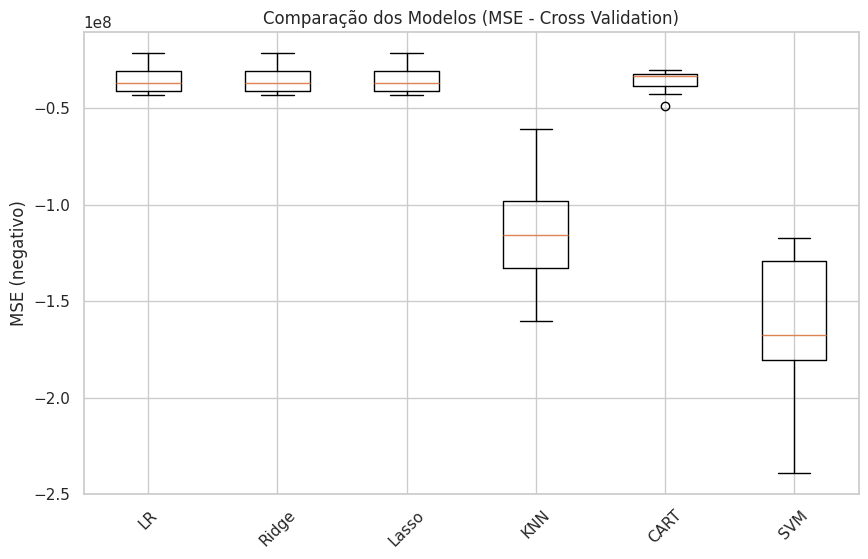

In [102]:
#Boxplot para comparação da validação cruzada
plt.figure(figsize=(10,6))
plt.boxplot(results, labels=names)
plt.title("Comparação dos Modelos (MSE - Cross Validation)")
plt.ylabel("MSE (negativo)")
plt.xticks(rotation=45)
plt.show()

Visualmente também gosto do gráfico de Swarmplot no qual cada ponto representa um fold da validação cruzada, deixando melhor a viusualização de dispersão.

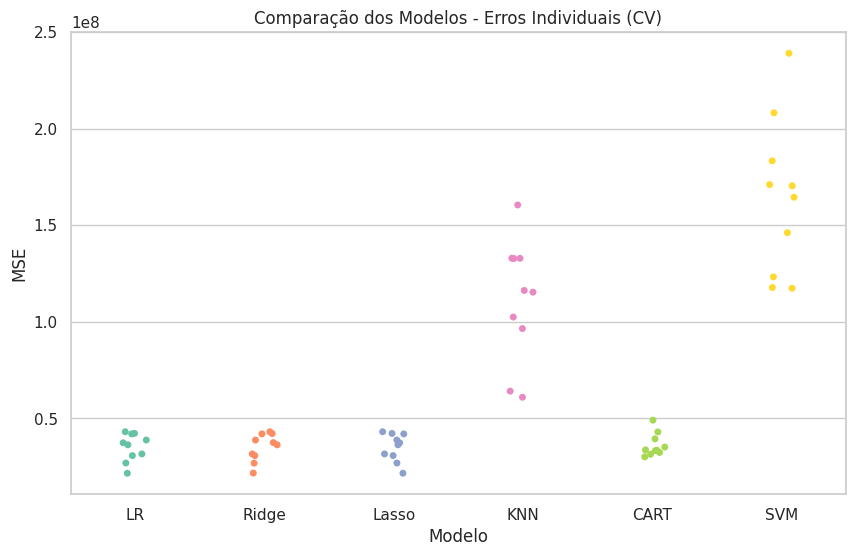

In [103]:
all_results = []
for name, cv in zip(names, results):
    for val in cv:
        all_results.append([name, abs(val)])

res_df = pd.DataFrame(all_results, columns=["Modelo", "MSE"])

plt.figure(figsize=(10,6))
sns.stripplot(data=res_df, x="Modelo", y="MSE", jitter=True, palette="Set2")
plt.title("Comparação dos Modelos - Erros Individuais (CV)")
plt.show()

## Validação dos Resultados dos Modelos

Como podemos ver, o modelo *Lasso* performa melhor na validação cruzada e o modelo *Ridge* performou melhor na base de teste.

Além disso olhando as dispersões dos *folds* vemos que as duas tem dispersões similares e o modelo que apresenta menos dispersão aparente é o "*CART*" (Decision Tree) que teve performance similar aos modelos de regressão na validação, porém um tanto pior na base de teste.

Como os dois modelos (*Lasso* e *Ridge*) foram os melhores, vamos testar um ajuste nos hiperparâmetros de ambos para ter a comparação final do melhor modelo e assim concluir nosso projeto.

## Teste de Hiperparâmetros

Os hiperparâmetros são variáveis que ajustam o tipo de aprendizado do modelo.

Para Regressão temos como principal hiperparâmetro é o *alpha* que controla a força da regularização. Com um alpha baixo o modelo fica mais próximo da regressão linear normal (próximo de zero). Com um alpha alto os coeficientes pode ser mais “penalizados” e podem se aproximar de zero.

Vamos então testar os hiperparâmetros dos dois modelos testando valores de valores de 0.0001 a 100, encontrar melhor alpha de ambos e comparar os resultados para decidir o melhor modelo.

In [109]:
#Definir grid de alpha
alphas = np.logspace(-4, 2, 20)  # valores de 0.0001 a 100

#Ridge
ridge = Ridge(random_state=SEED)
param_grid_ridge = {'alpha': alphas}

grid_ridge = GridSearchCV(ridge, param_grid_ridge, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_ridge.fit(x_train, y_train)

best_ridge = grid_ridge.best_estimator_
ridge_mse = abs(grid_ridge.best_score_)
ridge_rmse = np.sqrt(ridge_mse)
print("Ridge - Melhor alpha:", grid_ridge.best_params_)
print("Ridge - MSE CV:", ridge_mse)
print("Ridge - RMSE CV:", ridge_rmse)

#Avaliar no teste
y_pred_ridge = best_ridge.predict(x_test)
ridge_mse_test = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse_test = np.sqrt(ridge_mse_test)
print("Ridge - MSE Teste:", ridge_mse_test)
print("Ridge - RMSE Teste:", ridge_rmse_test)

#Lasso
lasso = Lasso(random_state=SEED, max_iter=10000)
param_grid_lasso = {'alpha': alphas}

grid_lasso = GridSearchCV(lasso, param_grid_lasso, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_lasso.fit(x_train, y_train)

best_lasso = grid_lasso.best_estimator_
lasso_mse = abs(grid_lasso.best_score_)
lasso_rmse = np.sqrt(lasso_mse)
print("\nLasso - Melhor alpha:", grid_lasso.best_params_)
print("Lasso - MSE CV:", lasso_mse)
print("Lasso - RMSE CV:", lasso_rmse)

#Avaliar no teste
y_pred_lasso = best_lasso.predict(x_test)
lasso_mse_test = mean_squared_error(y_test, y_pred_lasso)
lasso_rmse_test = np.sqrt(lasso_mse_test)
print("Lasso - MSE Teste:", lasso_mse_test)
print("Lasso - RMSE Teste:", lasso_rmse_test)

#Comparar RMSE no teste
if ridge_rmse_test < lasso_rmse_test:
    print("\nMelhor modelo final: Ridge")
else:
    print("\nMelhor modelo final: Lasso")

Ridge - Melhor alpha: {'alpha': np.float64(0.615848211066026)}
Ridge - MSE CV: 34947356.13048108
Ridge - RMSE CV: 5911.628889779963
Ridge - MSE Teste: 45561801.406063534
Ridge - RMSE Teste: 6749.948252102644

Lasso - Melhor alpha: {'alpha': np.float64(23.357214690901213)}
Lasso - MSE CV: 34919311.03737321
Lasso - RMSE CV: 5909.256386160039
Lasso - MSE Teste: 45520500.499801934
Lasso - RMSE Teste: 6746.888208633809

Melhor modelo final: Lasso


Como visto o *Lasso* teve o melhor resultado via comparação de MSE e RMSE.

Vamos testar alguns valores:

In [113]:

#Criar o modelo Lasso com o melhor alpha
best_alpha = 23.357214690901213
lasso_best = Lasso(alpha=best_alpha, random_state=SEED, max_iter=10000)

#Treinar no conjunto completo de treino
lasso_best.fit(x_train, y_train)

#Fazer previsões no conjunto de teste
y_pred = lasso_best.predict(x_test)

#Criar um DataFrame com os valores reais e preditos
df_compare = pd.DataFrame({
    'Real': y_test,
    'Predito': y_pred
})

#Mostrar as 5 primeiras linhas
print(df_compare.head())

             Real       Predito
393    9290.13950  11427.724057
1042  33475.81715  27401.218477
195    1639.56310   2689.918185
717   13112.60480  12021.801170
646    6123.56880   7041.127175


# **Conclusão**

Este trabalho tinha como objetivo principal a prática da aplicação de diferentes modelos de Regressão e o teste dos resultados obtidos para entender se apenas com as informações que poissuíamos do problema era possível aplicar um modelo de previsão do custo médico dado pelos convênios médicos dos EUA.

Como visto, mesmo otimizando os hiperparâmetros dos melhores modelos o valor de **erro** permanece alto e comparando com os resultados previstos, temos uma boa aproximação do valor, mas ainda assim as previsões erram por algumas centenas de dólares.

## Hipóteses

Como observado ao longo do projeto, entendemos que a quantidade de informação é pouca para prever com relativa precisão os custos médicos, retirando o ponto que vimos de duplicação das características com valores diferentes, olhando a correlação dos dados fica um tanto claro que faltam variáveis que caracterize melhor o problema encontrado.

A melhor confirmação que tivemos foi a relação entre a variável de fumantes e o custo, já que quase não existem valores altos de custo para beneficiários não fumantes.

## Próximos Passos

Como próximos passos enxergo dois caminhos, o primeiro e mais importante entender se a acertividade é de extrema importância, pois caso o valor final de acerto do modelo não seja necessário, poderiamos transformar em um modelo de classificação setando ranges de custo o que provavelmente daria mais performance e provavelmente resultados bem mais precisos.

Uma segunda abordagem seria, caso se tratasse de uma doméstica para fins executivos tentar coletar mais informações, mais métricas associadas ao custo que poderiam representar maior correlação e assim possivelmente convergir o modelo para resultados mais próximos dos valores de custo.